In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

<h3>K-means on a Synthetic Dataset

In [2]:
np.random.seed(0)

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

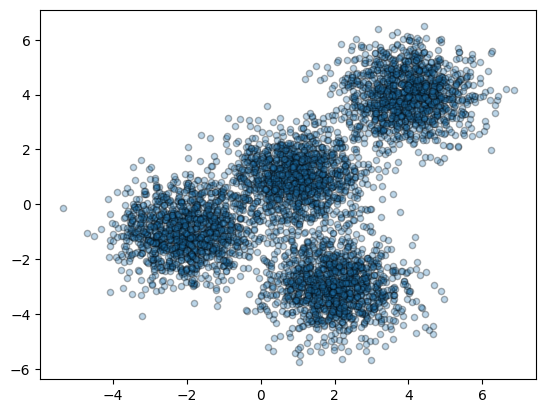

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.3, ec='k', s=80)

In [7]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [8]:
k_means_labels = k_means.labels_
print(k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[0 3 3 ... 1 0 0]
[[-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]]


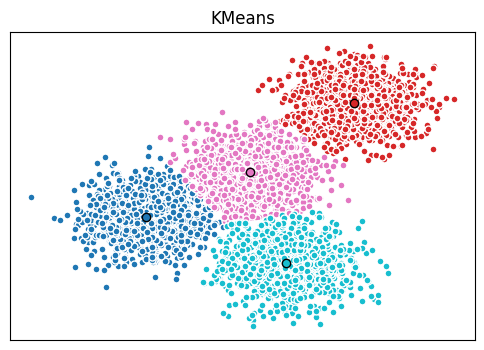

In [11]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

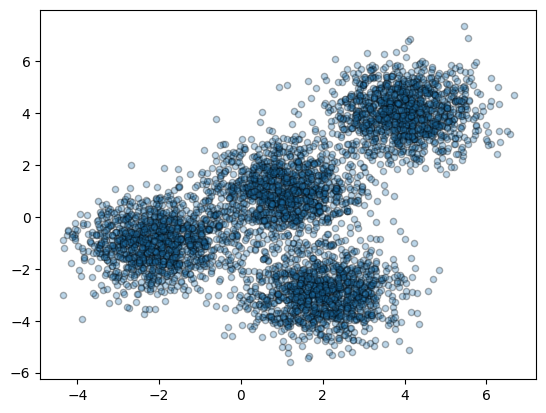

In [16]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1],[2, -3] , [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.3, ec='k', s=80)

In [17]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means.fit(X)

k_means_labels = k_means.labels_
print(k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[2 1 0 ... 2 1 0]
[[ 3.62987816  3.6651283 ]
 [-0.84928836 -0.20934757]
 [ 2.01387097 -2.8738074 ]]


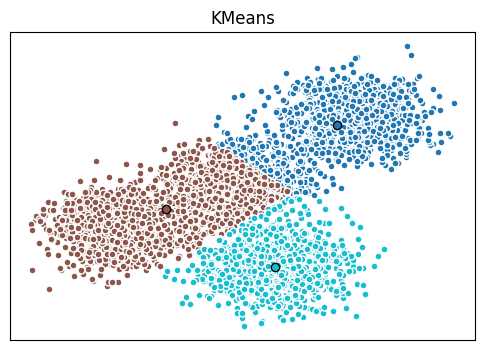

In [18]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [19]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=12)
k_means.fit(X)

k_means_labels = k_means.labels_
print(k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[0 2 1 ... 0 2 1]
[[ 2.01932776 -2.98372482]
 [ 3.98792313  4.04374798]
 [-2.49178031 -1.2657642 ]
 [ 1.17380964  1.1178918 ]
 [-0.98142729 -0.41978837]]


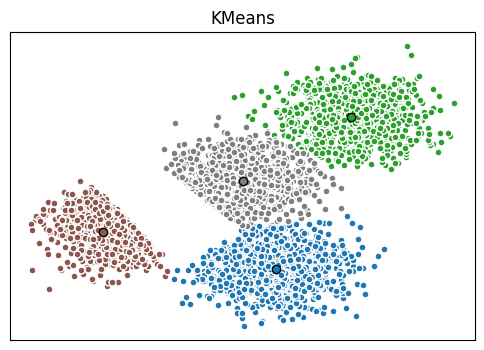

In [20]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

For k=3, the value of within-cluster sum of squares will be higher that that for k=4, since the points from different natural clusters are being grouped together, leading to underfitting of the k-means model.
For k=5, the value of within-cluster sum of squares will be lesser than that for k=4, since the points are distributed into more clusters than needed, leading to over-fitting of the k-means model.

<h3>Customer Segmentation with k-means

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [22]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [23]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [24]:
X = df.values[:, 1:]
clust_data = StandardScaler().fit_transform(X)

In [25]:
k = 3
k_means = KMeans(init='k-means++', n_clusters=k, n_init=15)
k_means.fit(X)
labels = k_means.labels_

In [26]:
df['Clus_km'] = labels

In [27]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


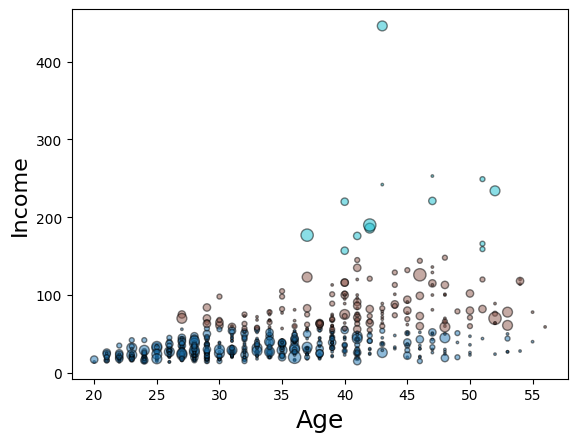

In [28]:
area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k', alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [29]:
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title="Education"),
        yaxis=dict(title="Age"),
        zaxis=dict(title="Income")
    ))

fig.show()

The 3 clusters can be:

- LATE CAREER, AFFLUENT, AND EDUCATED
- MID CAREER AND MIDDLE INCOME
- EARLY CAREER AND LOW INCOME